<a href="https://colab.research.google.com/github/tom1236908745/scikit-learn-try/blob/main/boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


boston_dataset = load_boston()
#説明変数
X_array = boston_dataset.data
#目的変数
y_array = boston_dataset.target
print(boston_dataset.keys())

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
boston['MEDV'] = boston_dataset.target

In [31]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [32]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


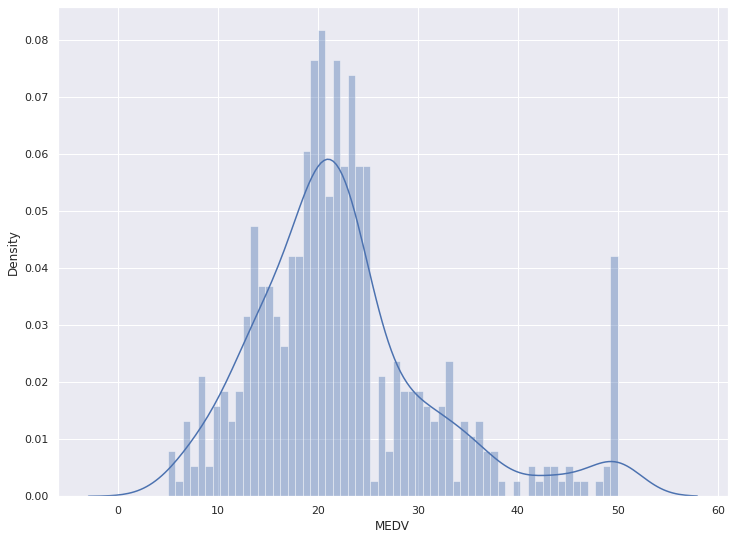

In [33]:
# figuresizeは描写するグラフの画面サイズです。
sns.set(rc={'figure.figsize':(12,9)})
# ヒストグラムを表示させます。binsはX軸のメモリの細かさです。
sns.distplot(boston['MEDV'], bins=60)
plt.show()

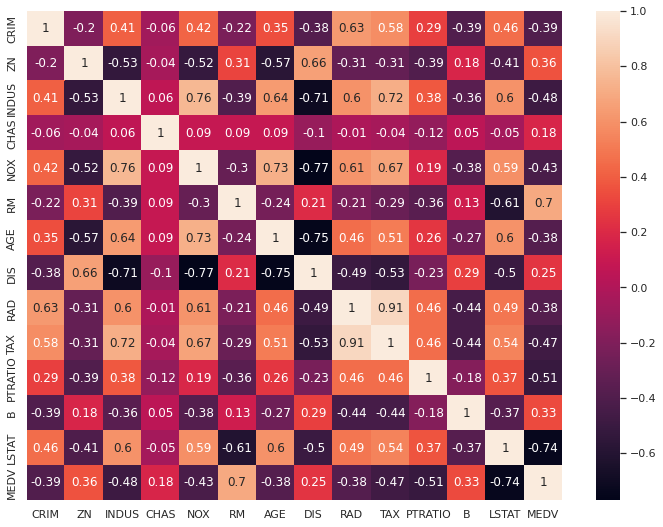

In [34]:
# 相関行列を作ります。round(2)は小数点以下をどれぐらい残して表示するかです。
correlation_matrix = boston.corr().round(2)
# annotをTrueにすると数値をグラフ内に表示してくれます。
sns.heatmap(data=correlation_matrix, annot=True)

In [35]:
# numpy concatenateを使いリストを結合させます。
# 新たに列名を指定して、Xつまり説明変数とします。
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
# もちろんY、目的変数には住宅価格を入れます。
Y = boston['MEDV']

In [36]:
# train_test_splitをインポートします。
from sklearn.model_selection import train_test_split
# テストサイズを2割にして、Random Stateは５
# つまり、乱数の種に５を指定して、乱数を生成させるという意味。
# 疑似乱数を固定することにより、ランダムではあるが、再現性があるため
# 機械学習におけるランダム設定には欠かせない。
# なぜなら、学習結果がランダムにしたから変わったのか、判別がつかなければ、
# 学習の検証にならないから。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [37]:
from sklearn.linear_model import LinearRegression
# 学習用モデルの箱を作ります。
lin_model = LinearRegression()
# トレーニング開始です。
lin_model.fit(X_train, Y_train)

LinearRegression()

In [38]:
# Root Mean Squared Error (RMSE) 関数
from sklearn.metrics import mean_squared_error
# R2 (決定係数) の計算関数
from sklearn.metrics import r2_score
# 学習用の目的変数の予測値を出す。
y_train_predict = lin_model.predict(X_train)
# Root Mean Squared Error (RMSE) 関数でRMSEの値を算出。
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
# R2 関数でR2の値を算出。
r2 = r2_score(Y_train, y_train_predict)
print("学習用モデル成果")
print("--------------------------------------")
print('RMSE の値は {}'.format(rmse))
print('R2 スコアは {}'.format(r2))
print("\n")
# 検証用のモデルと評価値を作成。
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
print("検証用モデル成果")
print("--------------------------------------")
print('RMSE の値は {}'.format(rmse))
print('R2 スコアは {}'.format(r2))

学習用モデル成果
--------------------------------------
RMSE の値は 5.6371293350711955
R2 スコアは 0.6300745149331701


検証用モデル成果
--------------------------------------
RMSE の値は 5.137400784702911
R2 スコアは 0.6628996975186952


In [39]:
# 学習用の目的変数の予測値。
y_train_predict = lin_model.predict(X_train)
print("学習用モデル成果")
print("--------------------------------------")
print('学習用モデル予測値の数値 {}'.format(y_train_predict))
print("\n")
# 検証用の目的変数の予測値。
y_test_predict = lin_model.predict(X_test)
print("検証用モデル成果")
print("--------------------------------------")
print('学習用モデル予測値の数値 {}'.format(y_test_predict))
print("\n")

学習用モデル成果
--------------------------------------
学習用モデル予測値の数値 [15.73918109 36.83151871 15.28595344 24.31085266 17.55975118 23.20733203
 25.68703572 16.49348708 28.31707647 21.82964776 20.15520244 29.17767683
 20.56213988 10.93020951 18.42830353 16.92633656 18.02630269 19.43931998
 23.46264743 32.1490266  26.85398128 20.00812693 24.21714649 28.355732
 21.74997792 17.19493688 22.98148318 36.74750169 37.16556736 24.45350196
 13.57935645 17.72551059 17.65458819 21.66083912 14.6323069   3.80282338
 27.53837657 30.30032173 21.972196   20.19736961 19.39152971 22.51599251
 31.37139147 23.32989843 29.33966548 19.65235025 23.64753389 28.29127846
 14.32495393 32.81238941 15.17993512 15.7235425  28.1632549  32.55484223
 14.81359874 28.27594813 32.74412501 31.04844905 21.20153895 31.47665722
  5.41650572 31.42301461 26.8810733  18.63859676 18.79218517 16.46936411
 30.94932187 13.97237784 23.86825587 21.49076752 15.45263254 18.49547209
 17.74442649 17.04543259 23.16751854 32.05456391 22.96777203 14.9

学習用モデル成果
--------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


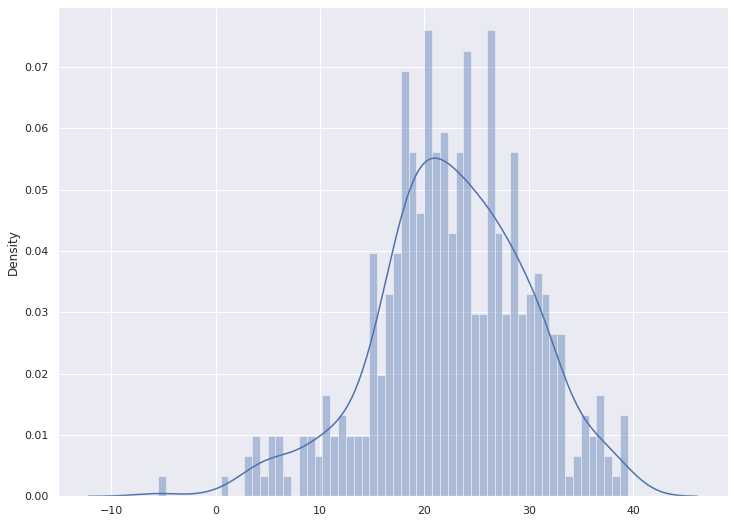

検証用モデル成果
--------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


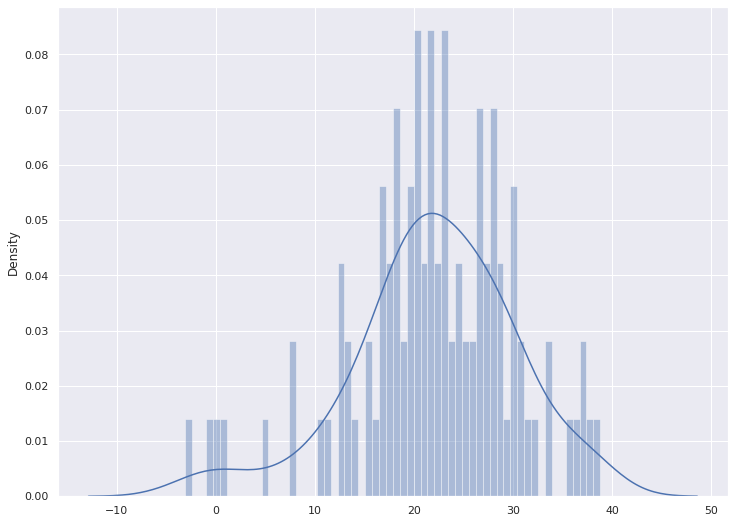

本来のデータ
--------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


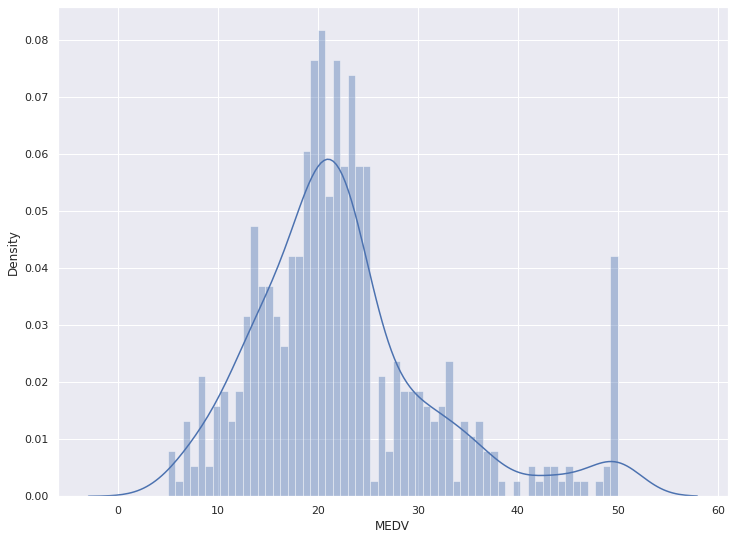

In [40]:
# 分かりにくいのでグラフ比較
print("学習用モデル成果")
print("--------------------------------------")
# figuresizeは描写するグラフの画面サイズです。
sns.set(rc={'figure.figsize':(12,9)})
# ヒストグラムを表示させます。binsはX軸のメモリの細かさです。
sns.distplot(y_train_predict, bins=60)
plt.show()
print("検証用モデル成果")
print("--------------------------------------")
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(y_test_predict, bins=60)
plt.show()
# 元のデータ
print("本来のデータ")
print("--------------------------------------")
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(boston['MEDV'], bins=60)
plt.show()